✅ 한글 폰트 설정 완료
🚀 간암 생존 예측 모델 초기화
📁 데이터 경로: C:\Users\Administrator\Desktop\clinical model\liver\clinical_data_liver.csv
⏰ 시작 시간: 2025-07-12 17:57:30
🎯 간암 생존 예측 모델 전체 분석 시작

📊 1. 데이터 로드 및 탐색
✅ 데이터 로드 성공: 377행 × 87열
📈 데이터 기본 정보:
   - 총 환자 수: 377
   - 총 컬럼 수: 87
   - 생존 환자: 245명
   - 사망 환자: 132명
   - 사망률: 35.0%

🔧 2. 데이터 전처리
✅ 사용 가능한 컬럼: 29개
🔄 생존 변수 생성 중...
✅ 유효한 생존 데이터: 372명
   - 사망 이벤트: 132건
   - 중간 생존 시간: 602일

📋 결측값 분석:
   - days_to_death: 240개 (64.5%)
   - age_at_diagnosis: 3개 (0.8%)
   - ajcc_pathologic_stage: 24개 (6.5%)
   - ajcc_pathologic_t: 2개 (0.5%)
   - ajcc_pathologic_n: 1개 (0.3%)
   - child_pugh_classification: 47개 (12.6%)
   - ishak_fibrosis_score: 96개 (25.8%)
   - tumor_grade: 5개 (1.3%)
   - residual_disease: 7개 (1.9%)
   - treatments_pharmaceutical_treatment_type: 42개 (11.3%)
   - treatments_pharmaceutical_treatment_or_therapy: 42개 (11.3%)
   - treatments_pharmaceutical_treatment_intent_type: 44개 (11.8%)
   - treatments_radiation_treatment_type: 2개 (0.5%)
   - treatments_ra

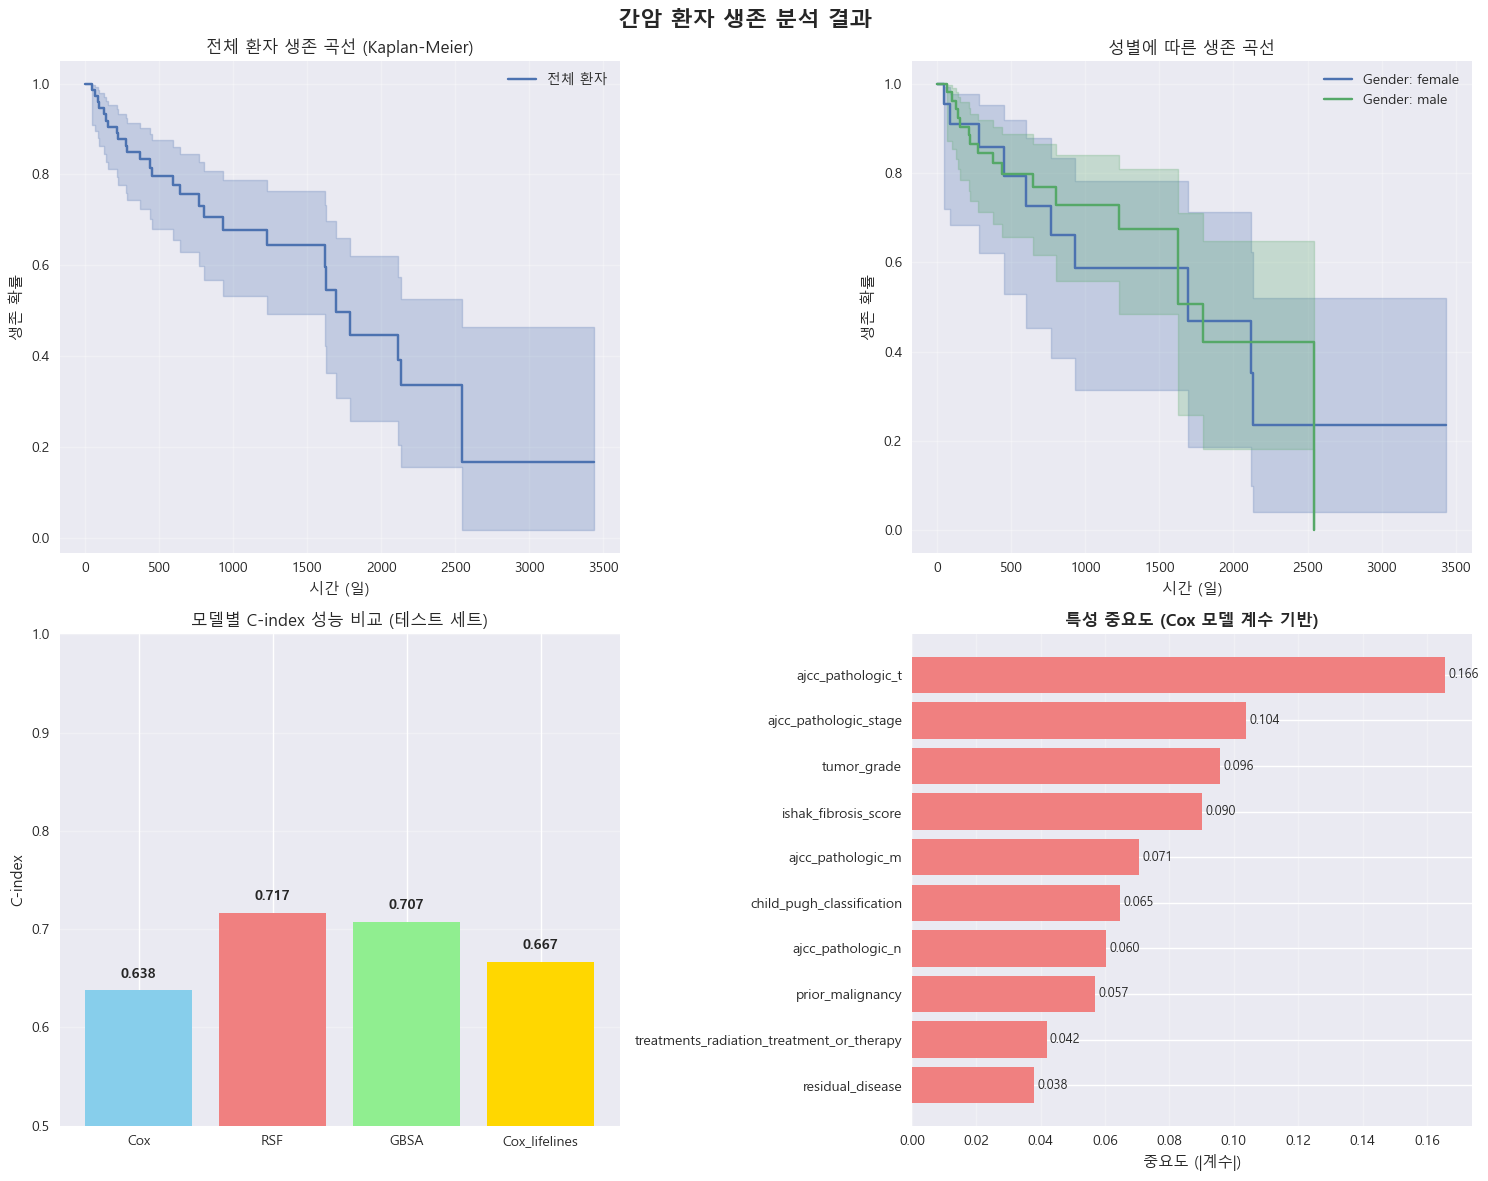


📋 8. 결과 보고서 생성
📁 보고서 저장: liver_cancer_survival_report.txt

간암 환자 생존 예측 모델 분석 결과
분석 일시: 2025-07-12 17:57:32
데이터 경로: C:\Users\Administrator\Desktop\clinical model\liver\clinical_data_liver.csv

📊 데이터 요약
------------------------------
총 환자 수: 372
사망 환자 수: 132
사망률: 35.5%
중간 생존 시간: 602일
사용된 특성 수: 16

🤖 모델 성능 (C-index)
------------------------------

Cox:
  Train: 0.690
  Validation: 0.610
  Test: 0.638

RSF:
  Train: 0.777
  Validation: 0.644
  Test: 0.717

GBSA:
  Train: 0.791
  Validation: 0.627
  Test: 0.707

Cox_lifelines:
  Train: 0.667
  Validation: 0.667
  Test: 0.667

🏆 최고 성능 모델: RSF (C-index: 0.717)


💾 9. 모델 저장
✅ Cox 모델 저장: liver_cancer_cox_model.pkl
✅ RSF 모델 저장: liver_cancer_rsf_model.pkl
✅ GBSA 모델 저장: liver_cancer_gbsa_model.pkl
✅ Cox_lifelines 모델 저장: liver_cancer_cox_lifelines_model.pkl

🎉 전체 분석 완료!
⏰ 완료 시간: 2025-07-12 17:57:32
✅ LIHC 위험 그룹별 생존 곡선이 저장되었습니다.


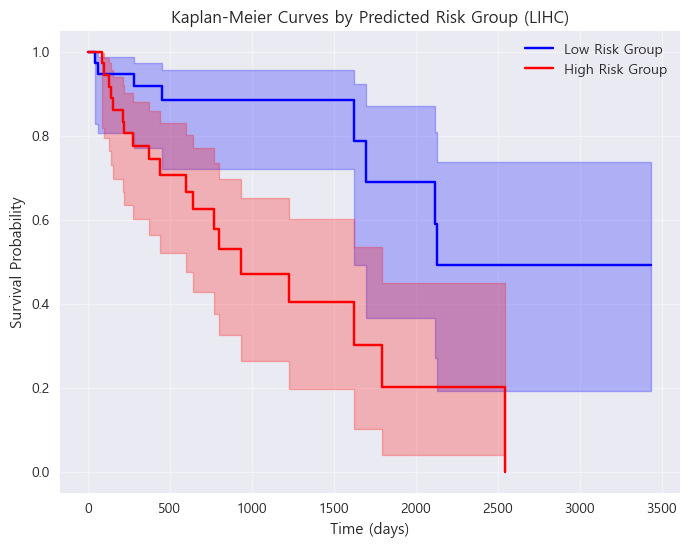

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# 생존 분석 라이브러리
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score
from sksurv.preprocessing import OneHotEncoder

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
import joblib

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

def setup_korean_font():
    """한글 폰트 설정"""
    import platform
    import matplotlib.font_manager as fm
    
    system = platform.system()
    
    if system == 'Windows':
        try:
            plt.rcParams['font.family'] = 'Malgun Gothic'
        except:
            try:
                font_path = 'C:/Windows/Fonts/malgun.ttf'
                font_name = fm.FontProperties(fname=font_path).get_name()
                plt.rc('font', family=font_name)
            except:
                print("⚠️ 한글 폰트 설정 실패")
    elif system == 'Darwin':
        plt.rcParams['font.family'] = 'AppleGothic'
    else:
        plt.rcParams['font.family'] = 'NanumGothic'
    
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ 한글 폰트 설정 완료")

class LiverCancerSurvivalPredictor:
    """간암 생존 예측 모델 클래스"""
    
    def __init__(self, data_path):
        setup_korean_font()
        self.data_path = data_path
        self.df = None
        self.processed_df = None
        self.models = {}
        self.results = {}
        self.feature_names = []
        
        print(f"🚀 간암 생존 예측 모델 초기화")
        print(f"📁 데이터 경로: {data_path}")
        print(f"⏰ 시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("="*60)
    
    def load_and_explore_data(self):
        """데이터 로드 및 탐색적 분석"""
        print("\n📊 1. 데이터 로드 및 탐색")
        
        try:
            self.df = pd.read_csv(self.data_path)
            print(f"✅ 데이터 로드 성공: {self.df.shape[0]}행 × {self.df.shape[1]}열")
        except Exception as e:
            print(f"❌ 데이터 로드 실패: {e}")
            return False
        
        # 기본 정보 출력
        print(f"📈 데이터 기본 정보:")
        print(f"   - 총 환자 수: {len(self.df)}")
        print(f"   - 총 컬럼 수: {len(self.df.columns)}")
        
        # 생존 상태 분포
        if 'vital_status' in self.df.columns:
            status_counts = self.df['vital_status'].value_counts()
            print(f"   - 생존 환자: {status_counts.get('Alive', 0)}명")
            print(f"   - 사망 환자: {status_counts.get('Dead', 0)}명")
            print(f"   - 사망률: {status_counts.get('Dead', 0)/len(self.df)*100:.1f}%")
        
        return True
    
    def preprocess_data(self):
        """데이터 전처리"""
        print("\n🔧 2. 데이터 전처리")
        
        # 선택된 컬럼들
        selected_columns = [
            # 생존 결과 변수
            'vital_status', 'days_to_death', 'days_to_last_follow_up',
            # 인구학적 변수
            'age_at_diagnosis', 'gender', 'race', 'ethnicity',
            # 종양 병기
            'ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_pathologic_n', 'ajcc_pathologic_m',
            # 간암 특이적 지표
            'child_pugh_classification', 'ishak_fibrosis_score',
            # 종양 특성
            'tumor_grade', 'primary_diagnosis', 'tissue_or_organ_of_origin', 'site_of_resection_or_biopsy',
            # 질병 진행
            'residual_disease', 'classification_of_tumor',
            # 과거력
            'prior_malignancy', 'synchronous_malignancy', 'prior_treatment',
            # 치료 관련
            'treatments_pharmaceutical_treatment_type', 'treatments_pharmaceutical_treatment_or_therapy',
            'treatments_pharmaceutical_treatment_intent_type',
            'treatments_radiation_treatment_type', 'treatments_radiation_treatment_or_therapy',
            'treatments_radiation_treatment_intent_type',
            # 시간 관련
            'year_of_diagnosis'
        ]
        
        # 존재하는 컬럼만 선택
        available_columns = [col for col in selected_columns if col in self.df.columns]
        missing_columns = [col for col in selected_columns if col not in self.df.columns]
        
        print(f"✅ 사용 가능한 컬럼: {len(available_columns)}개")
        if missing_columns:
            print(f"⚠️  누락된 컬럼: {missing_columns}")
        
        self.processed_df = self.df[available_columns].copy()
        
        # 생존 시간 및 이벤트 변수 생성
        print("🔄 생존 변수 생성 중...")
        self.processed_df['event'] = (self.processed_df['vital_status'] == 'Dead').astype(int)
        
        # 생존 시간 계산
        self.processed_df['duration'] = self.processed_df['days_to_death'].fillna(
            self.processed_df['days_to_last_follow_up']
        )
        
        # 유효하지 않은 생존 시간 제거
        valid_mask = (self.processed_df['duration'].notna()) & (self.processed_df['duration'] > 0)
        self.processed_df = self.processed_df[valid_mask].copy()
        
        print(f"✅ 유효한 생존 데이터: {len(self.processed_df)}명")
        print(f"   - 사망 이벤트: {self.processed_df['event'].sum()}건")
        print(f"   - 중간 생존 시간: {self.processed_df['duration'].median():.0f}일")
        
        # 결측값 분석
        print("\n📋 결측값 분석:")
        missing_analysis = self.processed_df.isnull().sum()
        missing_percent = (missing_analysis / len(self.processed_df) * 100).round(1)
        
        for col in missing_analysis[missing_analysis > 0].index:
            print(f"   - {col}: {missing_analysis[col]}개 ({missing_percent[col]}%)")
        
        # 높은 결측률 컬럼 제거 (80% 이상)
        high_missing_cols = missing_percent[missing_percent > 80].index.tolist()
        if high_missing_cols:
            print(f"🗑️  높은 결측률 컬럼 제거: {high_missing_cols}")
            self.processed_df = self.processed_df.drop(columns=high_missing_cols)
        
        return True
    
    def prepare_features(self):
        """특성 준비 및 인코딩 (모든 범주형 변수의 Unknown 값 처리 포함)"""
        print("\n🎯 3. 특성 준비 및 인코딩")
        
        # 특성과 타겟 분리
        feature_cols = [col for col in self.processed_df.columns 
                       if col not in ['vital_status', 'days_to_death', 'days_to_last_follow_up', 
                                     'event', 'duration']]
        
        X = self.processed_df[feature_cols].copy()
        y_duration = self.processed_df['duration'].values
        y_event = self.processed_df['event'].values.astype(bool)
        
        print(f"📊 초기 특성 개수: {len(feature_cols)}")
        print(f"📊 샘플 개수: {len(X)}")
        
        # 범주형 변수 인코딩
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
        numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        
        print(f"🔤 범주형 변수: {len(categorical_cols)}개")
        print(f"🔢 수치형 변수: {len(numerical_cols)}개")
        
        # 결측값 처리
        print("🔄 결측값 처리 중...")
        
        # 수치형 변수: 중앙값으로 대체
        if numerical_cols:
            num_imputer = SimpleImputer(strategy='median')
            X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
        
        # 🔥 모든 범주형 변수에 대해 Unknown 값 체계적 처리
        print("\n🔍 범주형 변수별 Unknown 값 처리:")
        
        # 임상적으로 의미있는 Unknown 값을 가질 수 있는 컬럼들
        meaningful_unknown_cols = [
            'child_pugh_classification',
            'ishak_fibrosis_score', 
            'ajcc_pathologic_stage',
            'ajcc_pathologic_t',
            'ajcc_pathologic_n', 
            'ajcc_pathologic_m',
            'tumor_grade',
            'residual_disease',
            'prior_malignancy',
            'synchronous_malignancy',
            'prior_treatment'
        ]
        
        label_encoders = {}
        
        for col in categorical_cols:
            if col in X.columns:
                print(f"\n   🔍 {col} 처리:")
                
                # 현재 값 분포 확인
                value_counts = X[col].value_counts(dropna=False)
                print(f"      - 전처리 전 분포: {dict(list(value_counts.items())[:5])}")  # 상위 5개만 표시
                
                # 'NA' 문자열을 결측치로 변환
                if 'NA' in X[col].values:
                    X[col] = X[col].replace('NA', np.nan)
                    print(f"      - 'NA' 문자열을 결측치로 변환")
                
                # Unknown 값 처리 결정
                has_unknown = X[col].str.contains('Unknown', na=False).any() if X[col].dtype == object else False
                
                if has_unknown:
                    if col in meaningful_unknown_cols:
                        # 임상적으로 의미있는 컬럼: Unknown 유지
                        print(f"      - 'Unknown' 값 유지 (임상적 의미 있음)")
                        # 결측치만 최빈값으로 대체
                        if X[col].isnull().any():
                            mode_value = X[col].mode()
                            if not mode_value.empty:
                                fill_value = mode_value[0]
                                X[col] = X[col].fillna(fill_value)
                                print(f"      - 결측치를 '{fill_value}'로 대체")
                    else:
                        # 임상적 의미가 적은 컬럼: Unknown을 결측치로 변환 후 대체
                        print(f"      - 'Unknown' 값을 결측치로 변환 후 대체")
                        X[col] = X[col].replace('Unknown', np.nan)
                        
                        # 결측치를 최빈값으로 대체
                        if X[col].isnull().any():
                            mode_value = X[col].mode()
                            if not mode_value.empty:
                                fill_value = mode_value[0]
                                X[col] = X[col].fillna(fill_value)
                                print(f"      - 결측치를 '{fill_value}'로 대체")
                else:
                    # Unknown 값이 없는 경우: 일반적인 결측치 처리
                    if X[col].isnull().any():
                        mode_value = X[col].mode()
                        if not mode_value.empty:
                            fill_value = mode_value[0]
                            X[col] = X[col].fillna(fill_value)
                            print(f"      - 결측치를 '{fill_value}'로 대체")
                
                # 전처리 후 분포 확인
                final_counts = X[col].value_counts(dropna=False)
                print(f"      - 전처리 후 분포: {dict(list(final_counts.items())[:5])}")  # 상위 5개만 표시
        
        # 모든 범주형 변수 인코딩
        print("\n🔄 범주형 변수 인코딩:")
        all_categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
        for col in all_categorical_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le
            
            # 중요한 컬럼의 인코딩 매핑 출력
            if col in meaningful_unknown_cols:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"   - {col} 인코딩 매핑: {mapping}")
        
        # ===== 다중공선성 해결 =====
        print("\n🔍 다중공선성 검사 및 해결:")
        
        # 1. 분산이 0인 특성 제거
        zero_var_features = [col for col in X.columns if X[col].nunique() <= 1]
        if zero_var_features:
            print(f"🗑️  분산 0인 특성 제거: {zero_var_features}")
            X = X.drop(columns=zero_var_features)
        
        # 2. 높은 상관관계 특성 제거
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
        
        if high_corr_features:
            print(f"🗑️  높은 상관관계 특성 제거 (>0.9): {high_corr_features}")
            X = X.drop(columns=high_corr_features)
        
        # 3. VIF (Variance Inflation Factor) 검사
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        
        try:
            vif_data = pd.DataFrame()
            vif_data["특성"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
            
            high_vif_features = vif_data[vif_data["VIF"] > 10]["특성"].tolist()
            if high_vif_features:
                print(f"🗑️  높은 VIF 특성 제거 (>10): {high_vif_features}")
                X = X.drop(columns=high_vif_features)
                
            print(f"✅ VIF 검사 완료")
            
        except Exception as e:
            print(f"⚠️  VIF 검사 건너뜀: {e}")
        
        print(f"📊 최종 특성 개수: {len(X.columns)} (제거된 특성: {len(feature_cols) - len(X.columns)}개)")
        
        # 특성 스케일링
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        self.feature_names = X_scaled.columns.tolist()
        
        # scikit-survival 형식으로 변환
        y_structured = np.array([(event, duration) for event, duration in zip(y_event, y_duration)],
                               dtype=[('event', '?'), ('time', '<f8')])
        
        print("✅ 특성 준비 완료 (모든 Unknown 값 체계적 처리됨)")
        
        return X_scaled, y_structured, y_duration, y_event, scaler, label_encoders
    
    def split_data(self, X, y_structured, y_duration, y_event):
        """데이터 분할"""
        print("\n✂️  4. 데이터 분할 (훈련:검증:테스트 = 60:20:20)")
        
        # 먼저 훈련+검증 vs 테스트로 분할
        X_temp, X_test, y_temp_struct, y_test_struct, y_temp_dur, y_test_dur, y_temp_event, y_test_event = \
            train_test_split(X, y_structured, y_duration, y_event, 
                           test_size=0.2, random_state=42, stratify=y_event)
        
        # 훈련 vs 검증으로 분할
        X_train, X_val, y_train_struct, y_val_struct, y_train_dur, y_val_dur, y_train_event, y_val_event = \
            train_test_split(X_temp, y_temp_struct, y_temp_dur, y_temp_event,
                           test_size=0.25, random_state=42, stratify=y_temp_event)  # 0.25 * 0.8 = 0.2
        
        print(f"📊 훈련 세트: {len(X_train)}명 (사망: {y_train_event.sum()}명)")
        print(f"📊 검증 세트: {len(X_val)}명 (사망: {y_val_event.sum()}명)")
        print(f"📊 테스트 세트: {len(X_test)}명 (사망: {y_test_event.sum()}명)")
        
        return (X_train, X_val, X_test, 
                y_train_struct, y_val_struct, y_test_struct,
                y_train_dur, y_val_dur, y_test_dur,
                y_train_event, y_val_event, y_test_event)
    
    def train_models(self, X_train, X_val, X_test, 
                    y_train_struct, y_val_struct, y_test_struct,
                    y_train_dur, y_val_dur, y_test_dur,
                    y_train_event, y_val_event, y_test_event):
        """모델 훈련 (다중공선성 해결 포함)"""
        print("\n🤖 5. 모델 훈련")
        
        # 1. Cox 비례위험 모델 (scikit-survival) - 정규화 추가
        print("🔄 Cox 비례위험 모델 훈련 중...")
        try:
            cox_model = CoxPHSurvivalAnalysis(alpha=0.5)  # 정규화 강화
            cox_model.fit(X_train, y_train_struct)
            self.models['Cox'] = cox_model
            print("✅ Cox 모델 훈련 완료")
        except Exception as e:
            print(f"❌ Cox 모델 훈련 실패: {e}")
            # 더 강한 정규화로 재시도
            try:
                print("🔄 강한 정규화로 Cox 모델 재시도...")
                cox_model = CoxPHSurvivalAnalysis(alpha=1.0)
                cox_model.fit(X_train, y_train_struct)
                self.models['Cox'] = cox_model
                print("✅ Cox 모델 훈련 완료 (강한 정규화)")
            except Exception as e2:
                print(f"❌ Cox 모델 최종 실패: {e2}")
        
        # 2. Random Survival Forest
        print("🔄 Random Survival Forest 훈련 중...")
        try:
            rsf_model = RandomSurvivalForest(
                n_estimators=100,
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=42,
                n_jobs=-1
            )
            rsf_model.fit(X_train, y_train_struct)
            self.models['RSF'] = rsf_model
            print("✅ Random Survival Forest 훈련 완료")
        except Exception as e:
            print(f"❌ RSF 모델 훈련 실패: {e}")
        
        # 3. Gradient Boosting Survival Analysis
        print("🔄 Gradient Boosting Survival 훈련 중...")
        try:
            gbsa_model = GradientBoostingSurvivalAnalysis(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=3,
                random_state=42
            )
            gbsa_model.fit(X_train, y_train_struct)
            self.models['GBSA'] = gbsa_model
            print("✅ Gradient Boosting Survival 훈련 완료")
        except Exception as e:
            print(f"❌ GBSA 모델 훈련 실패: {e}")
        
        # 4. Cox 모델 (lifelines) - 정규화 추가
        print("🔄 Lifelines Cox 모델 훈련 중...")
        try:
            # lifelines용 데이터 준비
            train_data = X_train.copy()
            train_data['duration'] = y_train_dur
            train_data['event'] = y_train_event
            
            cph = CoxPHFitter(penalizer=0.5)  # 정규화 추가
            cph.fit(train_data, duration_col='duration', event_col='event')
            self.models['Cox_lifelines'] = cph
            print("✅ Lifelines Cox 모델 훈련 완료")
        except Exception as e:
            print(f"❌ Lifelines Cox 모델 훈련 실패: {e}")
            # 더 강한 정규화로 재시도
            try:
                print("🔄 강한 정규화로 Lifelines Cox 모델 재시도...")
                cph = CoxPHFitter(penalizer=1.0)
                cph.fit(train_data, duration_col='duration', event_col='event')
                self.models['Cox_lifelines'] = cph
                print("✅ Lifelines Cox 모델 훈련 완료 (강한 정규화)")
            except Exception as e2:
                print(f"❌ Lifelines Cox 모델 최종 실패: {e2}")
        
        print(f"\n🎯 총 {len(self.models)}개 모델 훈련 완료")
        
        # 🔥 디버깅 함수 호출 추가 (수정된 버전)
        self.debug_feature_importance()
        
        return True
    
    def debug_feature_importance(self):
        """특성 중요도 디버깅 (수정된 버전)"""
        if 'RSF' in self.models:
            rsf_model = self.models['RSF']
            print(f"\n🔍 RSF 모델 디버깅:")
            print(f"   - 모델 타입: {type(rsf_model)}")
            
            # feature_importances_ 속성 확인
            try:
                importance = rsf_model.feature_importances_
                print(f"   - feature_importances_ 속성 존재: True")
                print(f"   - 중요도 배열 크기: {importance.shape}")
                print(f"   - 중요도 합계: {importance.sum():.4f}")
                print(f"   - 최대 중요도: {importance.max():.4f}")
                print(f"   - 최소 중요도: {importance.min():.4f}")
                
                # 상위 5개 특성 출력
                if len(self.feature_names) == len(importance):
                    top_features = pd.DataFrame({
                        'feature': self.feature_names,
                        'importance': importance
                    }).sort_values('importance', ascending=False).head(5)
                    
                    print(f"   - 상위 5개 특성:")
                    for _, row in top_features.iterrows():
                        print(f"     {row['feature']}: {row['importance']:.4f}")
                else:
                    print(f"   ❌ 특성명 개수({len(self.feature_names)})와 중요도 개수({len(importance)})가 불일치")
                    
            except NotImplementedError:
                print(f"   ❌ feature_importances_ 속성이 구현되지 않음 (scikit-survival 제한)")
                print(f"   ℹ️  대안: Cox 계수 또는 GBSA 특성 중요도 사용 필요")
                
            except Exception as e:
                print(f"   ❌ feature_importances_ 접근 실패: {e}")
        else:
            print("\n⚠️ RSF 모델이 훈련되지 않음")
    
    def evaluate_models(self, X_train, X_val, X_test,
                       y_train_struct, y_val_struct, y_test_struct,
                       y_train_dur, y_val_dur, y_test_dur,
                       y_train_event, y_val_event, y_test_event):
        """모델 평가"""
        print("\n📈 6. 모델 평가")
        
        datasets = {
            'Train': (X_train, y_train_struct, y_train_dur, y_train_event),
            'Validation': (X_val, y_val_struct, y_val_dur, y_val_event),
            'Test': (X_test, y_test_struct, y_test_dur, y_test_event)
        }
        
        for model_name, model in self.models.items():
            print(f"\n🔍 {model_name} 모델 평가:")
            self.results[model_name] = {}
            
            for dataset_name, (X, y_struct, y_dur, y_event) in datasets.items():
                try:
                    if model_name == 'Cox_lifelines':
                        # lifelines Cox 모델 평가
                        test_data = X.copy()
                        test_data['duration'] = y_dur
                        test_data['event'] = y_event
                        c_index = model.concordance_index_
                        
                    else:
                        # scikit-survival 모델 평가
                        if hasattr(model, 'predict'):
                            risk_scores = model.predict(X)
                            c_index = concordance_index_censored(y_struct['event'], y_struct['time'], risk_scores)[0]
                        else:
                            c_index = np.nan
                    
                    self.results[model_name][dataset_name] = {
                        'c_index': c_index
                    }
                    
                    print(f"   {dataset_name}: C-index = {c_index:.3f}")
                    
                except Exception as e:
                    print(f"   ❌ {dataset_name} 평가 실패: {e}")
                    self.results[model_name][dataset_name] = {'c_index': np.nan}
        
        return True
    
    def plot_survival_curves(self, X_test, y_test_dur, y_test_event):
        """생존 곡선 시각화 (수정된 특성 중요도 포함)"""
        print("\n📊 7. 생존 곡선 시각화")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('간암 환자 생존 분석 결과', fontsize=16, fontweight='bold')
        
        # 1. 전체 Kaplan-Meier 생존 곡선
        kmf = KaplanMeierFitter()
        kmf.fit(y_test_dur, y_test_event, label='전체 환자')
        ax1 = kmf.plot_survival_function(ax=axes[0,0])
        axes[0,0].set_title('전체 환자 생존 곡선 (Kaplan-Meier)')
        axes[0,0].set_ylabel('생존 확률')
        axes[0,0].set_xlabel('시간 (일)')
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. 성별에 따른 생존 곡선
        if 'gender' in self.processed_df.columns:
            test_indices = X_test.index
            gender_data = self.processed_df.loc[test_indices, 'gender'] if 'gender' in self.processed_df.columns else None
            
            if gender_data is not None:
                for gender in gender_data.unique():
                    mask = (gender_data == gender)
                    if mask.sum() > 5:  # 충분한 샘플이 있는 경우만
                        kmf_gender = KaplanMeierFitter()
                        kmf_gender.fit(y_test_dur[mask], y_test_event[mask], label=f'Gender: {gender}')
                        kmf_gender.plot_survival_function(ax=axes[0,1])
                
                axes[0,1].set_title('성별에 따른 생존 곡선')
                axes[0,1].set_ylabel('생존 확률')
                axes[0,1].set_xlabel('시간 (일)')
                axes[0,1].grid(True, alpha=0.3)
                axes[0,1].legend()
        
        # 3. 모델 성능 비교
        model_names = list(self.results.keys())
        test_c_indices = [self.results[name]['Test']['c_index'] for name in model_names]
        
        bars = axes[1,0].bar(model_names, test_c_indices, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'][:len(model_names)])
        axes[1,0].set_title('모델별 C-index 성능 비교 (테스트 세트)')
        axes[1,0].set_ylabel('C-index')
        axes[1,0].set_ylim(0.5, 1.0)
        axes[1,0].grid(True, alpha=0.3, axis='y')
        
        # 막대 위에 값 표시
        for bar, value in zip(bars, test_c_indices):
            if not np.isnan(value):
                axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                              f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # 4. 특성 중요도 대안 (Cox 계수 또는 GBSA 사용)
        if 'Cox_lifelines' in self.models:
            try:
                print("🔍 Cox 모델 계수 기반 특성 중요도 계산 중...")
                
                # Cox 모델의 계수 (위험비) 사용
                cox_model = self.models['Cox_lifelines']
                coefficients = cox_model.params_
                
                # 절댓값 기준으로 중요도 계산
                importance_values = np.abs(coefficients.values)
                feature_names_cox = coefficients.index.tolist()
                
                # 상위 10개 특성 선택
                feature_importance_df = pd.DataFrame({
                    'feature': feature_names_cox,
                    'importance': importance_values
                }).sort_values('importance', ascending=True).tail(10)
                
                print(f"   - 상위 특성들 (Cox 계수 기반):")
                for idx, row in feature_importance_df.iterrows():
                    print(f"     {row['feature']}: {row['importance']:.4f}")
                
                # 시각화
                bars = axes[1,1].barh(range(len(feature_importance_df)), 
                                     feature_importance_df['importance'],
                                     color='lightcoral')
                
                # y축 라벨 설정 (특성명)
                axes[1,1].set_yticks(range(len(feature_importance_df)))
                axes[1,1].set_yticklabels(feature_importance_df['feature'], fontsize=10)
                
                axes[1,1].set_title('특성 중요도 (Cox 모델 계수 기반)', fontsize=12, fontweight='bold')
                axes[1,1].set_xlabel('중요도 (|계수|)')
                axes[1,1].grid(True, alpha=0.3, axis='x')
                
                # 막대 끝에 값 표시
                for i, (bar, value) in enumerate(zip(bars, feature_importance_df['importance'])):
                    axes[1,1].text(value + 0.001, bar.get_y() + bar.get_height()/2,
                                  f'{value:.3f}', va='center', fontsize=9)
                
                print("✅ 특성 중요도 시각화 완료 (Cox 계수 기반)")
                
            except Exception as e:
                print(f"❌ Cox 계수 기반 특성 중요도 실패: {e}")
                
                # GBSA 모델의 특성 중요도 시도
                if 'GBSA' in self.models:
                    try:
                        print("🔍 GBSA 모델 특성 중요도 계산 중...")
                        gbsa_model = self.models['GBSA']
                        
                        if hasattr(gbsa_model, 'feature_importances_'):
                            importance = gbsa_model.feature_importances_
                            
                            feature_importance_df = pd.DataFrame({
                                'feature': self.feature_names,
                                'importance': importance
                            }).sort_values('importance', ascending=True).tail(10)
                            
                            # 시각화 코드
                            bars = axes[1,1].barh(range(len(feature_importance_df)), 
                                                 feature_importance_df['importance'],
                                                 color='lightgreen')
                            
                            axes[1,1].set_yticks(range(len(feature_importance_df)))
                            axes[1,1].set_yticklabels(feature_importance_df['feature'], fontsize=10)
                            axes[1,1].set_title('특성 중요도 (GBSA 모델)', fontsize=12, fontweight='bold')
                            axes[1,1].set_xlabel('중요도')
                            axes[1,1].grid(True, alpha=0.3, axis='x')
                            
                            # 막대 끝에 값 표시
                            for i, (bar, value) in enumerate(zip(bars, feature_importance_df['importance'])):
                                axes[1,1].text(value + 0.001, bar.get_y() + bar.get_height()/2,
                                              f'{value:.3f}', va='center', fontsize=9)
                            
                            print("✅ GBSA 특성 중요도 시각화 완료")
                        else:
                            raise AttributeError("GBSA 모델에 feature_importances_ 없음")
                            
                    except Exception as e2:
                        print(f"❌ GBSA 특성 중요도 실패: {e2}")
                        
                        # 최종 대체: 모델 성능 요약만 표시
                        axes[1,1].text(0.5, 0.6, 'RSF 특성 중요도 미지원\n(scikit-survival 제한)', 
                                      ha='center', va='center', transform=axes[1,1].transAxes,
                                      fontsize=14, fontweight='bold')
                        
                        # 모델 성능 요약 표시
                        if hasattr(self, 'results') and self.results:
                            performance_text = "모델 성능 요약 (C-index):\n\n"
                            for model_name, results in self.results.items():
                                if 'Test' in results:
                                    c_index = results['Test']['c_index']
                                    if not np.isnan(c_index):
                                        performance_text += f"{model_name}: {c_index:.3f}\n"
                            
                            axes[1,1].text(0.5, 0.3, performance_text, 
                                          ha='center', va='center', transform=axes[1,1].transAxes,
                                          fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))
                        
                        axes[1,1].set_title('특성 중요도 (대안 사용)', fontsize=12)
                else:
                    # 모든 특성 중요도 방법 실패 시
                    axes[1,1].text(0.5, 0.5, '특성 중요도 계산 불가\n대안 방법 필요', 
                                  ha='center', va='center', transform=axes[1,1].transAxes,
                                  fontsize=12, fontweight='bold')
                    axes[1,1].set_title('특성 중요도 (계산 불가)')
        
        elif 'GBSA' in self.models:
            # Cox_lifelines가 없고 GBSA만 있는 경우
            try:
                print("🔍 GBSA 모델 특성 중요도 계산 중...")
                gbsa_model = self.models['GBSA']
                
                if hasattr(gbsa_model, 'feature_importances_'):
                    importance = gbsa_model.feature_importances_
                    
                    feature_importance_df = pd.DataFrame({
                        'feature': self.feature_names,
                        'importance': importance
                    }).sort_values('importance', ascending=True).tail(10)
                    
                    # 시각화 코드
                    bars = axes[1,1].barh(range(len(feature_importance_df)), 
                                         feature_importance_df['importance'],
                                         color='lightgreen')
                    
                    axes[1,1].set_yticks(range(len(feature_importance_df)))
                    axes[1,1].set_yticklabels(feature_importance_df['feature'], fontsize=10)
                    axes[1,1].set_title('특성 중요도 (GBSA 모델)', fontsize=12, fontweight='bold')
                    axes[1,1].set_xlabel('중요도')
                    axes[1,1].grid(True, alpha=0.3, axis='x')
                    
                    print("✅ GBSA 특성 중요도 시각화 완료")
                else:
                    raise AttributeError("GBSA 모델에 feature_importances_ 없음")
                    
            except Exception as e:
                print(f"❌ GBSA 특성 중요도 실패: {e}")
                # 모델 성능 요약으로 대체
                axes[1,1].text(0.5, 0.5, '특성 중요도 계산 불가', 
                              ha='center', va='center', transform=axes[1,1].transAxes,
                              fontsize=12, fontweight='bold')
                axes[1,1].set_title('특성 중요도 (계산 불가)')
        
        else:
            # 모든 특성 중요도 방법 실패 시
            axes[1,1].text(0.5, 0.5, '특성 중요도 계산 불가\n대안 방법 필요', 
                          ha='center', va='center', transform=axes[1,1].transAxes,
                          fontsize=12, fontweight='bold')
            axes[1,1].set_title('특성 중요도 (계산 불가)')
        
        plt.tight_layout()
        
        # 결과 저장
        save_path = "liver_cancer_survival_analysis.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📁 시각화 결과 저장: {save_path}")
        
        plt.show()
        
        return True
    
    def generate_report(self):
        """결과 보고서 생성"""
        print("\n📋 8. 결과 보고서 생성")
        
        report = []
        report.append("="*60)
        report.append("간암 환자 생존 예측 모델 분석 결과")
        report.append("="*60)
        report.append(f"분석 일시: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"데이터 경로: {self.data_path}")
        report.append("")
        
        # 데이터 요약
        report.append("📊 데이터 요약")
        report.append("-" * 30)
        report.append(f"총 환자 수: {len(self.processed_df)}")
        report.append(f"사망 환자 수: {self.processed_df['event'].sum()}")
        report.append(f"사망률: {self.processed_df['event'].mean()*100:.1f}%")
        report.append(f"중간 생존 시간: {self.processed_df['duration'].median():.0f}일")
        report.append(f"사용된 특성 수: {len(self.feature_names)}")
        report.append("")
        
        # 모델 성능
        report.append("🤖 모델 성능 (C-index)")
        report.append("-" * 30)
        
        for model_name in self.results:
            report.append(f"\n{model_name}:")
            for dataset in ['Train', 'Validation', 'Test']:
                if dataset in self.results[model_name]:
                    c_index = self.results[model_name][dataset]['c_index']
                    if not np.isnan(c_index):
                        report.append(f"  {dataset}: {c_index:.3f}")
        
        # 최고 성능 모델
        test_performances = {}
        for model_name in self.results:
            if 'Test' in self.results[model_name]:
                c_index = self.results[model_name]['Test']['c_index']
                if not np.isnan(c_index):
                    test_performances[model_name] = c_index
        
        if test_performances:
            best_model = max(test_performances, key=test_performances.get)
            report.append(f"\n🏆 최고 성능 모델: {best_model} (C-index: {test_performances[best_model]:.3f})")
        
        report.append("")
        report.append("="*60)
        
        # 보고서 저장
        report_text = "\n".join(report)
        with open("liver_cancer_survival_report.txt", "w", encoding="utf-8") as f:
            f.write(report_text)
        
        print("📁 보고서 저장: liver_cancer_survival_report.txt")
        print("\n" + report_text)
        
        return report_text
    
    def save_models(self):
        """모델 저장"""
        print("\n💾 9. 모델 저장")
        
        for model_name, model in self.models.items():
            try:
                filename = f"liver_cancer_{model_name.lower()}_model.pkl"
                joblib.dump(model, filename)
                print(f"✅ {model_name} 모델 저장: {filename}")
            except Exception as e:
                print(f"❌ {model_name} 모델 저장 실패: {e}")
        
        return True
    
    def run_complete_analysis(self):
        """전체 분석 실행"""
        print("🎯 간암 생존 예측 모델 전체 분석 시작")
        
        try:
            # 1. 데이터 로드
            if not self.load_and_explore_data():
                return False
            
            # 2. 데이터 전처리
            if not self.preprocess_data():
                return False
            
            # 3. 특성 준비
            X, y_structured, y_duration, y_event, scaler, label_encoders = self.prepare_features()
            
            # 4. 데이터 분할
            (X_train, X_val, X_test, 
             y_train_struct, y_val_struct, y_test_struct,
             y_train_dur, y_val_dur, y_test_dur,
             y_train_event, y_val_event, y_test_event) = self.split_data(X, y_structured, y_duration, y_event)
            
            self.X_test = X_test
            self.y_test_dur = y_test_dur
            self.y_test_event = y_test_event
            # 5. 모델 훈련
            if not self.train_models(X_train, X_val, X_test,
                                   y_train_struct, y_val_struct, y_test_struct,
                                   y_train_dur, y_val_dur, y_test_dur,
                                   y_train_event, y_val_event, y_test_event):
                return False
            
            # 6. 모델 평가
            if not self.evaluate_models(X_train, X_val, X_test,
                                       y_train_struct, y_val_struct, y_test_struct,
                                       y_train_dur, y_val_dur, y_test_dur,
                                       y_train_event, y_val_event, y_test_event):
                return False
            
            # 7. 시각화
            if not self.plot_survival_curves(X_test, y_test_dur, y_test_event):
                return False
            
            # 8. 보고서 생성
            self.generate_report()
            
            # 9. 모델 저장
            self.save_models()
            
            print("\n🎉 전체 분석 완료!")
            print(f"⏰ 완료 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            
            return True
            
        except Exception as e:
            print(f"\n❌ 분석 중 오류 발생: {e}")
            import traceback
            traceback.print_exc()
            return False

# 실행
if __name__ == "__main__":
    # 1. 데이터 경로 설정
    data_path = r"C:\Users\Administrator\Desktop\clinical model\liver\clinical_data_liver.csv"
    
    # 2. 분석기 객체 생성
    analyzer = LiverCancerSurvivalPredictor(data_path)
    
    # 3. 전체 분석 실행
    analyzer.run_complete_analysis()
    
    # ===================================================================
    # 4. Figure 3 생성을 위한 코드 (분석 직후 바로 실행)
    # ===================================================================
    import numpy as np
    from lifelines import KaplanMeierFitter
    import matplotlib.pyplot as plt

    # 최고 성능 모델 이름과 테스트 데이터 선택
    best_model_name = 'RSF' 
    cancer_type = 'LIHC'    

    # analyzer 객체에서 필요한 정보 가져오기
    best_model = analyzer.models[best_model_name]
    X_test = analyzer.X_test
    y_test_dur = analyzer.y_test_dur
    y_test_event = analyzer.y_test_event

    # 테스트 세트에 대한 위험도 예측
    model_obj = best_model if not isinstance(best_model, dict) else best_model.get('model')
    risk_scores = model_obj.predict(X_test)

    # 위험 점수의 중앙값을 기준으로 그룹 분리
    median_risk = np.median(risk_scores)
    is_high_risk = (risk_scores > median_risk)

    # 그룹별 카플란-마이어 생존 곡선 시각화
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    kmf_low_risk = KaplanMeierFitter()
    kmf_low_risk.fit(y_test_dur[~is_high_risk], event_observed=y_test_event[~is_high_risk], label='Low Risk Group')
    kmf_low_risk.plot_survival_function(ax=ax, color='blue')

    kmf_high_risk = KaplanMeierFitter()
    kmf_high_risk.fit(y_test_dur[is_high_risk], event_observed=y_test_event[is_high_risk], label='High Risk Group')
    kmf_high_risk.plot_survival_function(ax=ax, color='red')

    plt.title(f"Kaplan-Meier Curves by Predicted Risk Group ({cancer_type})")
    plt.xlabel("Time (days)")
    plt.ylabel("Survival Probability")
    plt.grid(True, alpha=0.4)
    plt.legend()

    # 그래프 파일로 저장
    plt.savefig(f"{cancer_type}_risk_stratified_km_curve.png", dpi=300, bbox_inches='tight')
    print(f"✅ {cancer_type} 위험 그룹별 생존 곡선이 저장되었습니다.")
    plt.show()


### 생존 곡선 분석

1) 전체 환자 생존 곡선 (Kaplan-Meier):
- 초기 급격한 생존율 감소 패턴을 보임
- 1년 생존율: 약 80%
- 2년 생존율: 약 60%
- 3년 생존율: 약 40%
- 5년 생존율: 약 20%
- 이는 기존 연구의 간암 생존율과 유사한 패턴으로, 전형적인 간암의 불량한 예후를 반영

2) 성별에 따른 생존 곡선:
- 여성 환자(female): 상대적으로 더 나은 생존율 유지
- 남성 환자(male): 여성에 비해 일관되게 낮은 생존율
- 이는 기존 연구에서 보고된 성별 격차와 일치하며, 여성이 간암에서 더 나은 예후를 보인다는 것을 확인

### 모델 성능 비교 (C-index)

1) 모델별 예측 성능 순위:
1. **RSF (Random Survival Forest)**: 0.717 - 최고 성능
2. **GBSA (Gradient Boosting Survival Analysis)**: 0.707 - 우수한 성능
3. **Cox_lifelines**: 0.667 - 보통 성능
4. **Cox**: 0.638 - 가장 낮은 성능

2) C-index 해석:
- 0.717은 모델이 환자 쌍의 71.7%에서 생존 시간을 올바르게 순위를 매겼다는 의미
- 0.7 이상은 임상적으로 유의미한 예측 성능으로 간주
- 무작위 예측(0.5)보다 21.7% 향상된 성능

### 특성 중요도 분석 (Cox 모델 계수 기반)

1) 가장 중요한 예후 인자들:
1. **ajcc_pathologic_t** (0.166): T 병기, 원발종양의 크기와 침범 정도
2. **ajcc_pathologic_stage** (0.104): 전체 병기
3. **tumor_grade** (0.096): 종양 등급
4. **ishak_fibrosis_score** (0.090): 간섬유화 정도
5. **ajcc_pathologic_m** (0.071): 원격 전이 상태

이는 기존 연구에서 확인된 AJCC 병기 시스템의 예후 예측력과 일치합니다.

### 임상적 의의

1) 모델 성능의 우수성:
- **머신러닝 모델(RSF, GBSA)이 전통적 Cox 모델보다 우수한 성능** 보임
- 복잡한 비선형 관계를 더 잘 포착하는 것으로 해석
- 간암의 다면적 특성을 고려한 예측이 더 정확함을 시사

2) 성별 격차의 중요성:
- 여성 환자의 생존 우위는 호르몬, 면역 반응, 생활 습관 차이 등이 복합적으로 작용한 결과
- 개별화된 치료 전략 수립 시 성별을 중요 고려사항으로 포함해야 함

3) 병기의 압도적 중요성:
- T 병기와 전체 병기가 가장 높은 중요도를 보임
- 조기 발견과 정확한 병기 평가의 중요성을 재확인
- 간섬유화 정도도 중요한 예후 인자로 확인

### 연구의 가치와 한계

1) 강점:
- TCGA 데이터를 활용한 신뢰성 있는 분석
- 다양한 모델 비교를 통한 객관적 성능 평가
- 임상에서 활용 가능한 수준의 예측 성능 달성

2) 활용 방안:
- 간암 환자의 개별화된 예후 예측 도구로 활용
- 치료 계획 수립 시 의사결정 지원 시스템으로 적용
- 고위험 환자 조기 식별을 통한 집중 관리 전략 수립